In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

In [47]:
df = pd.read_csv("online_retail_combined_dataset.csv")

In [48]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [49]:
df.shape

(1067371, 8)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [51]:
df.describe()

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [52]:
df.describe(include='O')

,Invoice,StockCode,Description,InvoiceDate,Country
count,1067371,1067371,1062989,1067371,1067371
unique,53628,5305,5698,47635,43
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-06 16:57:00,United Kingdom
freq,1350,5829,5918,1350,981330


- **Filter the dataset for Customer ID column where is NA**

In [53]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [54]:
df[df["Customer ID"].isna()].shape

(243007, 8)

In [55]:
df[df['Quantity']< 0 ].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


In [56]:
df[df['Quantity']< 0 ].shape

(22950, 8)

- **Typical Invoices**

In [57]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match("^\\d{6}$") == True]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.00,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.00,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.00,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.00,France


- **Weird looking Invoices**

In [58]:
df['Invoice'] = df['Invoice'].astype('str')
df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.00,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.00,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.00,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.00,United Kingdom


In [59]:
df['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [60]:
df[df['Invoice'].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom
825443,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
825444,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
825445,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [61]:
df['StockCode'] = df['StockCode'].astype('str')
df[df['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
1067270,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.00,United Kingdom
1067302,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.00,United Kingdom
1067308,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.00,United Kingdom
1067317,581580,85049E,SCANDINAVIAN REDS RIBBONS,2,2011-12-09 12:20:00,1.25,12748.00,United Kingdom


In [62]:
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE',
       'DCGS0055', 'DCGS0074', 'DCGS0057', 'DCGS0073', 'DCGS0071',
       'DCGS0066P', 'DCGS0067', 'CRUK'], dtype=object)

In [63]:
df[df["StockCode"].str.contains("^DOT")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
1062295,581219,DOT,DOTCOM POSTAGE,1,2011-12-08 09:28:00,1008.96,NaN,United Kingdom
1062715,581238,DOT,DOTCOM POSTAGE,1,2011-12-08 10:53:00,1683.75,NaN,United Kingdom
1064829,581439,DOT,DOTCOM POSTAGE,1,2011-12-08 16:30:00,938.59,NaN,United Kingdom
1066369,581492,DOT,DOTCOM POSTAGE,1,2011-12-09 10:03:00,933.17,NaN,United Kingdom


**Lets Check How many Invalid StockCode**

In [64]:
stock_codes = ['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004', 'DCGS0076',
               'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001', 'gift_0001_80', 'DCGS0072',
               'gift_0001_20', 'DCGS0044', 'TEST002', 'gift_0001_10', 'gift_0001_50',
               'DCGS0066N', 'gift_0001_30', 'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60',
               'gift_0001_70', 'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
               'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT', 'DCGSLBOY',
               'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY', 'DCGSLGIRL', 'S', 'DCGS0069',
               'DCGS0070', 'DCGS0075', 'B', 'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE']

# Create DataFrame
stock_codes_df = pd.DataFrame({'StockCode': stock_codes})

In [65]:
# Apply filtering logic
valid_stock_codes = stock_codes_df[
    # Include stock codes that follow specific patterns
    stock_codes_df["StockCode"].str.match(r"^\d{5}$") |  # Matches StockCode like "47503"
    stock_codes_df["StockCode"].str.match(r"^\d{5}[a-zA-Z]+$") |  # Matches StockCode like "47503J"
    stock_codes_df["StockCode"].str.match(r"^DCGS\d+$") |  # Matches "DCGS" pattern followed by numbers
    stock_codes_df["StockCode"].str.contains(r"^PADS", na=False)  # Matches "PADS"
]

# Exclude irrelevant codes based on rules
excluded_stock_codes = stock_codes_df[
    stock_codes_df["StockCode"].str.contains(r"^(POST|D|DOT|M|C2|C3|BANK CHARGES|S|TEST|gift_|SP|AMAZONFEE|ADJUST)", na=False)
]
print("\nExcluded Stock Codes:")
excluded_stock_codes.head(10)


Excluded Stock Codes:


,StockCode
0,POST
1,D
2,DCGS0058
3,DCGS0068
4,DOT
5,M
6,DCGS0004
7,DCGS0076
8,C2
9,BANK CHARGES


In [66]:
len(excluded_stock_codes)

50

In [67]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


### Data Cleaning

In [88]:
cleaned_df = df.copy()

In [89]:
cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')
mask = (
    cleaned_df['Invoice'].str.match("^\\d{6}$") == True
)

cleaned_df = cleaned_df[mask]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [90]:
cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')
mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)
cleaned_df = cleaned_df[mask]
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [91]:
cleaned_df.dropna(subset=['Customer ID'], inplace=True)

In [92]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,802711.00,802711.00,802711.00
mean,13.34,2.93,15338.07
std,144.54,4.28,1693.93
min,1.00,0.00,12346.00
25%,2.00,1.25,13988.00
50%,5.00,1.95,15276.00
75%,12.00,3.75,16809.00
max,80995.00,649.50,18287.00


In [93]:
cleaned_df[cleaned_df["Price"] == 0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom


In [94]:
len(cleaned_df[cleaned_df["Price"] == 0])

62

In [95]:
cleaned_df = cleaned_df[cleaned_df["Price"] > 0.0]

In [96]:
cleaned_df.describe()

,Quantity,Price,Customer ID
count,802649.00,802649.00,802649.00
mean,13.32,2.93,15338.15
std,143.87,4.28,1693.90
min,1.00,0.00,12346.00
25%,2.00,1.25,13988.00
50%,5.00,1.95,15276.00
75%,12.00,3.75,16809.00
max,80995.00,649.50,18287.00


In [97]:
cleaned_df["Price"].min()

0.001

**Here is the summary of our data cleaning**

In [98]:
# Calculate key metrics
original_shape = df.shape
cleaned_shape = cleaned_df.shape
records_removed = original_shape[0] - cleaned_shape[0]
percentage_removed = (records_removed / original_shape[0]) * 100
percentage_left = 100 - percentage_removed

In [99]:
summary_data = {
    "Metric": [
        "Original Dataste Rows",
        "Cleaned Dataset Rows",
        "Records Removed",
        "Percentage Removed",
        "Percentage Left"
    ],
    "Results": [
        int(original_shape[0]),
        int(cleaned_shape[0]),
        int(records_removed),
        f"{round(percentage_removed, 2)}%",  # Add percentage sign
        f"{round(percentage_left, 2)}%"     # Add percentage sign
    ]
}

# Convert to a DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df


,Metric,Results
0,Original Dataste Rows,1067371
1,Cleaned Dataset Rows,802649
2,Records Removed,264722
3,Percentage Removed,24.8%
4,Percentage Left,75.2%


### Feature Engineering

In [100]:
cleaned_df['SalesLineTotal'] = cleaned_df['Quantity']* cleaned_df['Price']

In [101]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


**Aggregate the data grouping by Customer ID**

In [102]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index=False)\
    .agg(
        MonetaryValue=('SalesLineTotal', 'sum'),
        Frequency=("Invoice", 'nunique'),
        LastInvoiceDate=("InvoiceDate", "max")
    )
    
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,77352.96,3,2011-01-18 10:01:00
1,12347.00,5633.32,8,2011-12-07 15:52:00
2,12348.00,1658.40,5,2011-09-25 13:13:00
3,12349.00,3678.69,3,2011-11-21 09:51:00
4,12350.00,294.40,1,2011-02-02 16:01:00


In [103]:
# Ensure 'LastInvoiceDate' is in datetime format
aggregated_df['LastInvoiceDate'] = pd.to_datetime(aggregated_df['LastInvoiceDate'])

# Ensure 'max_invoice_date' is also in datetime format
max_invoice_date = aggregated_df['LastInvoiceDate'].max()

# Calculate 'Recency' in days
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,77352.96,3,2011-01-18 10:01:00,325
1,12347.00,5633.32,8,2011-12-07 15:52:00,1
2,12348.00,1658.40,5,2011-09-25 13:13:00,74
3,12349.00,3678.69,3,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309


**PS.**
- We could use todays date for recency, in real dataset, but we using LastInvoiceDate becuase the dataset is Old

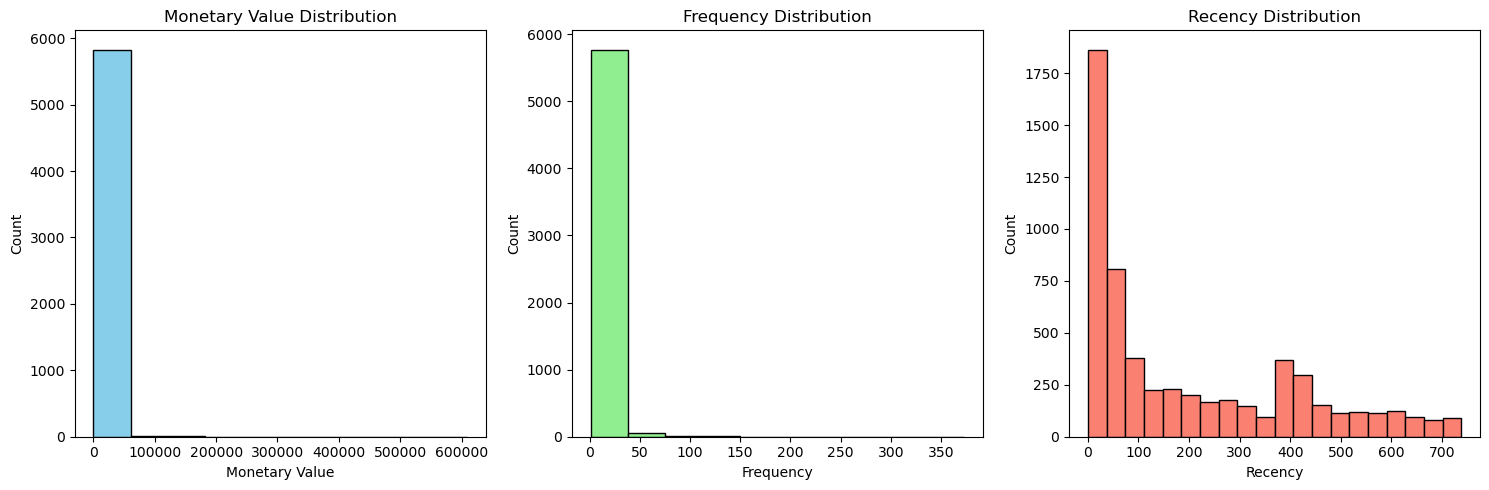

In [104]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

### **Insights:**
1. **Monetary Value:** Skewed low, most below **100,000**, with rare high outliers.  
2. **Frequency:** Mostly low, few exceed **50+**.  
3. **Recency:** Right-skewed, most recent; few long inactive.  

**Summary:**  
Pareto-like trends; focus on reactivating high-recency customers.

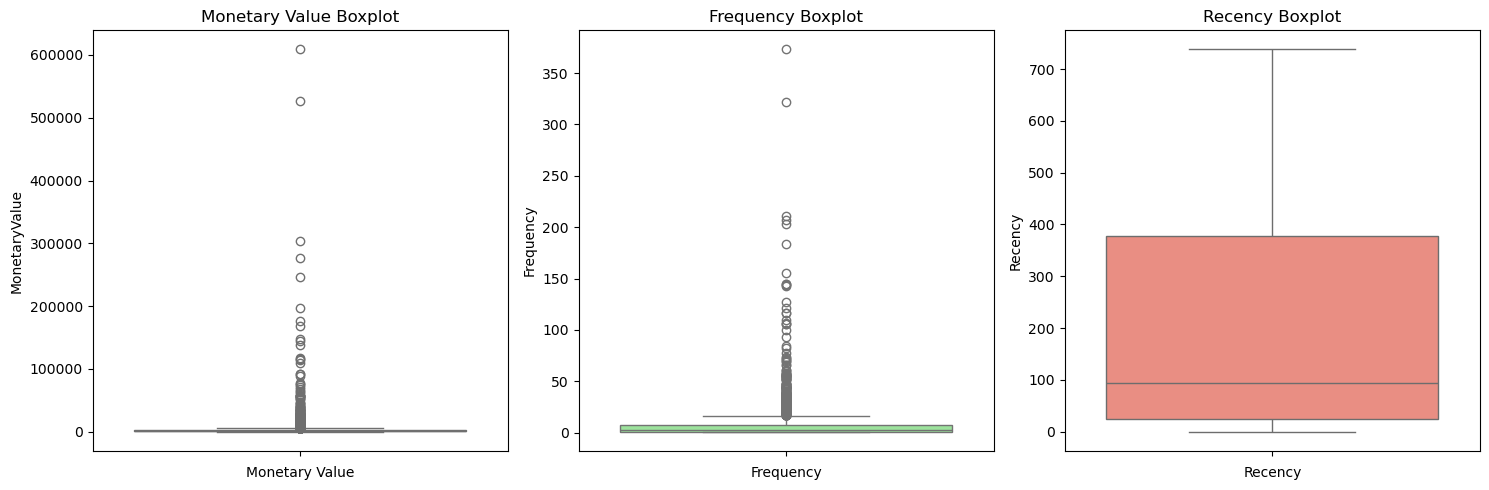

In [105]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

#### **Outlier Present:**

1. **Monetary Value:** Outliers >**100,000**; most values are low.  
2. **Frequency:** Outliers >**50+**; majority infrequent.  
3. **Recency:** Median **100 days**, with long-inactive outliers.  

**Actions:**  
Focus on high-value transactions, frequent customers, and reactivating inactive ones.

In [106]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR = M_Q3 - M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"] > (M_Q3 + 1.5 * M_IQR)) | (aggregated_df["MonetaryValue"] < (M_Q1 - 1.5 * M_IQR))].copy()

monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,620.00,620.00,620.00,620,620.00
mean,15077.78,18260.64,25.98,2011-10-19 01:33:52.548387072,50.98
min,12346.00,5217.44,1.00,2010-01-17 11:33:00,0.00
25%,13573.00,6591.86,12.00,2011-10-23 01:02:00,4.00
50%,14924.00,9131.81,18.00,2011-11-23 12:34:30,16.00
75%,16607.50,14486.35,29.00,2011-12-05 10:27:30,47.25
max,18260.00,608821.65,373.00,2011-12-09 12:49:00,691.00
std,1754.42,41750.24,31.13,NaN,102.87


In [107]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,424.00,424.00,424.00,424,424.00
mean,15373.75,21143.85,34.87,2011-11-08 06:13:43.160377344,30.79
min,12415.00,1820.44,17.00,2010-05-12 16:51:00,0.00
25%,13851.00,6368.09,20.00,2011-11-15 04:14:45,2.75
50%,15306.00,9760.71,25.00,2011-11-30 11:27:30,9.00
75%,16947.25,16691.30,35.00,2011-12-06 12:59:15,24.00
max,18283.00,608821.65,373.00,2011-12-09 12:49:00,575.00
std,1777.62,49369.50,34.68,NaN,70.63


In [108]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outliers_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
2,12348.00,1658.40,5,2011-09-25 13:13:00,74
3,12349.00,3678.69,3,2011-11-21 09:51:00,18
4,12350.00,294.40,1,2011-02-02 16:01:00,309
5,12351.00,300.93,1,2010-11-29 15:23:00,374
6,12352.00,1729.54,9,2011-11-03 14:37:00,35


In [109]:
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,5167.00,5167.00,5167.00,5167,5167.00
mean,15341.72,1133.52,3.69,2011-05-04 02:42:25.140313600,218.90
min,12348.00,2.95,1.00,2009-12-01 10:49:00,0.00
25%,13862.50,311.03,1.00,2010-11-11 13:06:30,32.00
50%,15355.00,717.51,3.00,2011-07-28 14:08:00,133.00
75%,16811.50,1579.13,5.00,2011-11-06 13:22:30,392.00
max,18287.00,5202.97,16.00,2011-12-09 12:50:00,738.00
std,1705.11,1128.97,3.19,NaN,211.12


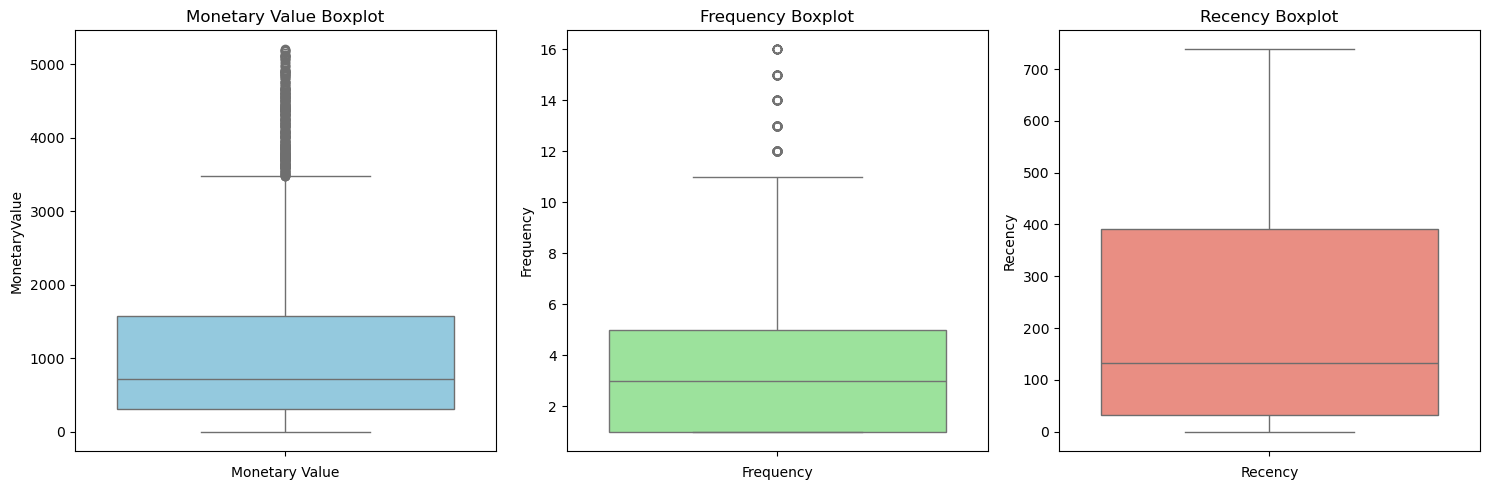

In [110]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

#### **Outlier Removed:**

1. **Monetary Value:** Median ~**1,000**, with few large transactions driving variability.  
2. **Frequency:** Median **2-4**; small group (**12-16**) shows high loyalty.  
3. **Recency:** Median ~**100-150 days**, with potential to reactivate customers inactive for **700+ days**.  

**Actions:** 
Focus on premium trends, loyalty programs, and reactivation efforts.  

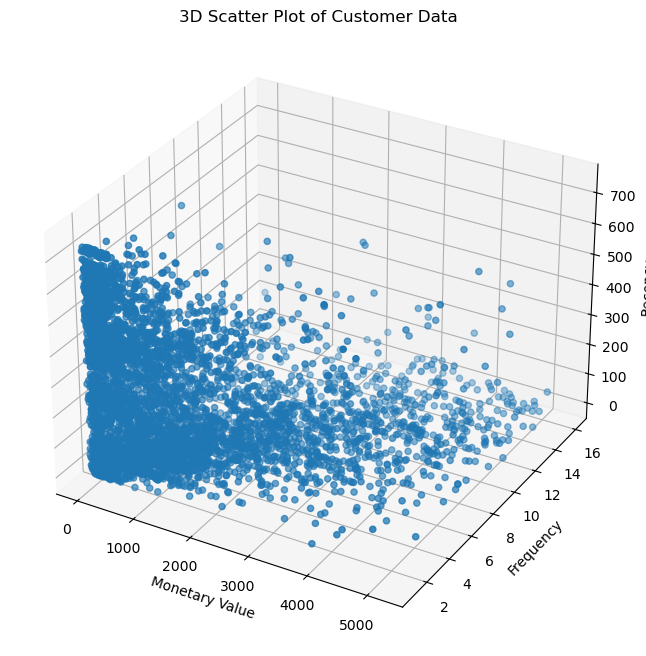

In [111]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

#### **Insights:**

1. **High Monetary Value:** Low frequency, moderate-to-high recency (big spenders, infrequent shoppers).  
2. **Low Monetary Value Cluster:** Low frequency, varying recency (occasional, low spenders).  
3. **Trends:** Weak positive link between frequency and monetary value; low recency often aligns with low frequency.  

#### **Actions:** 
Target retention for big spenders, reactivate low-value inactive customers, and nurture frequent moderate spenders.  

#### *Standard Scaling Formula:*

*The formula for standard scaling is:*  
$$
z = \frac{x - \mu}{\sigma}
$$
***Where:***
- **$(z)$:** The standardized value (how far $(x)$ is from the mean in terms of standard deviations).  
- **$(x)$:** The original data point.
- **$(mu)$:** The mean of the dataset.  
- **$(sigma)$:** The standard deviation (spread of the data).

***Explanation:*** 
- **Subtract the Mean $\mu$**: Centers the data around 0.  
- **Divide by the Standard Deviation ($\sigma$)**: Scales the data so the spread (variance) is 1.  
***Purpose:***  
This ensures all features contribute equally by putting them on the same scale (mean = 0, SD = 1).

In [112]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])
scaled_data

array([[ 0.46495994,  0.41035762, -0.68639195],
       [ 2.25462817, -0.21575129, -0.95167175],
       [-0.74333563, -0.84186021,  0.42683577],
       ...,
       [-0.67016465, -0.84186021,  2.08957165],
       [ 0.10001748, -0.52880575,  1.21793803],
       [ 2.65706855,  1.03646654, -0.8379804 ]])

In [113]:
scaled_df = pd.DataFrame(scaled_data, non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))
scaled_df

,MonetaryValue,Frequency,Recency
2,0.46,0.41,-0.69
3,2.25,-0.22,-0.95
4,-0.74,-0.84,0.43
5,-0.74,-0.84,0.73
6,0.53,1.66,-0.87
...,...,...,...
5846,-0.85,-0.53,-1.00
5848,-0.64,-0.84,1.00
5849,-0.67,-0.84,2.09
5850,0.10,-0.53,1.22


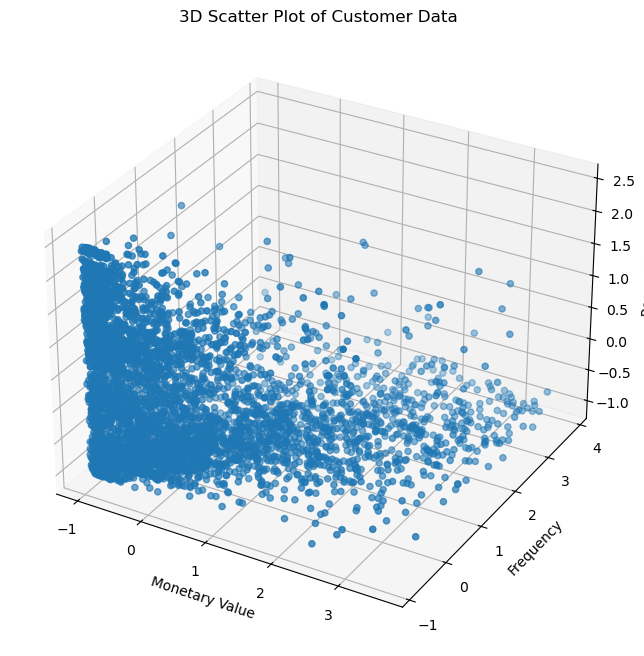

In [114]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection="3d")
scatter = ax.scatter(scaled_df["MonetaryValue"], scaled_df["Frequency"], scaled_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')
ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

#### **Scaled 3D Insights:**

1. **Distribution:** Values are centered around **0** (range: ~-1 to 3), confirming standardization.  
2. **Monetary Value vs Frequency:** Most customers have **low spending and infrequent transactions**, with few loyal, high-value outliers.  
3. **Recency:** Lower recency aligns with **higher frequency** and spending, indicating better engagement.  

#### **Actions:**  
- Boost loyalty for **high-value, low-frequency** customers.  
- Reactivate **high-recency, low-value** customers.  
- Retain **moderate-frequency, low-recency** customers to increase spending.  

### KMeans Clustering

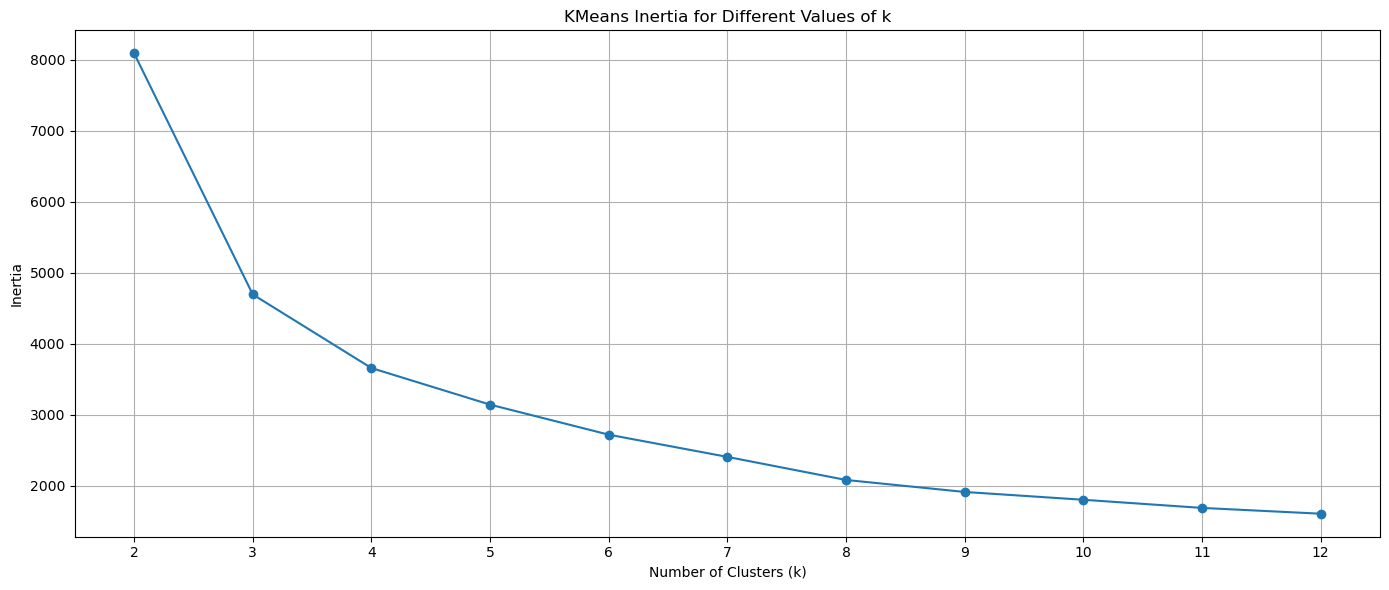

In [117]:
max_k = 12
inertia = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Elbow Point Insights:**

1. **Optimal Clusters:**  
   - Sharp drop in inertia between **k = 2 and k = 4**, with an **elbow** at **k = 4**.  
   - Beyond **k = 4**, reductions in inertia are minimal.  

2. **Conclusion:**  
   - **4 clusters** offer the best balance between complexity and performance.  

3. **Next Steps:**  
   - Apply **Silhouette Score** to find **#** of clusters to pick.  

#### **Silhouette Score**
The ***Silhouette Score*** assesses clustering quality:  
$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$ 
- **$s(i)$:** Score $(-1)$ to $(1)$, higher is better.  
- **$a(i)$:** Avg. distance to points in the same cluster (similarity).  
- **$b(i)$:** Avg. distance to points in the nearest other cluster (separation).  

***Example:***  
Imagine customers are grouped into 3 clusters:  
- **$a(i)$:** Measures how similar a customer is to others in their group (e.g., frequent buyers).  
- **$b(i)$:** Measures how different the customer is from the closest other group (e.g., infrequent buyers).  

*If $a(i)$ is small (customer fits well in their group) and $b(i)$ is large (customer is far from other groups), the clustering performs well.*

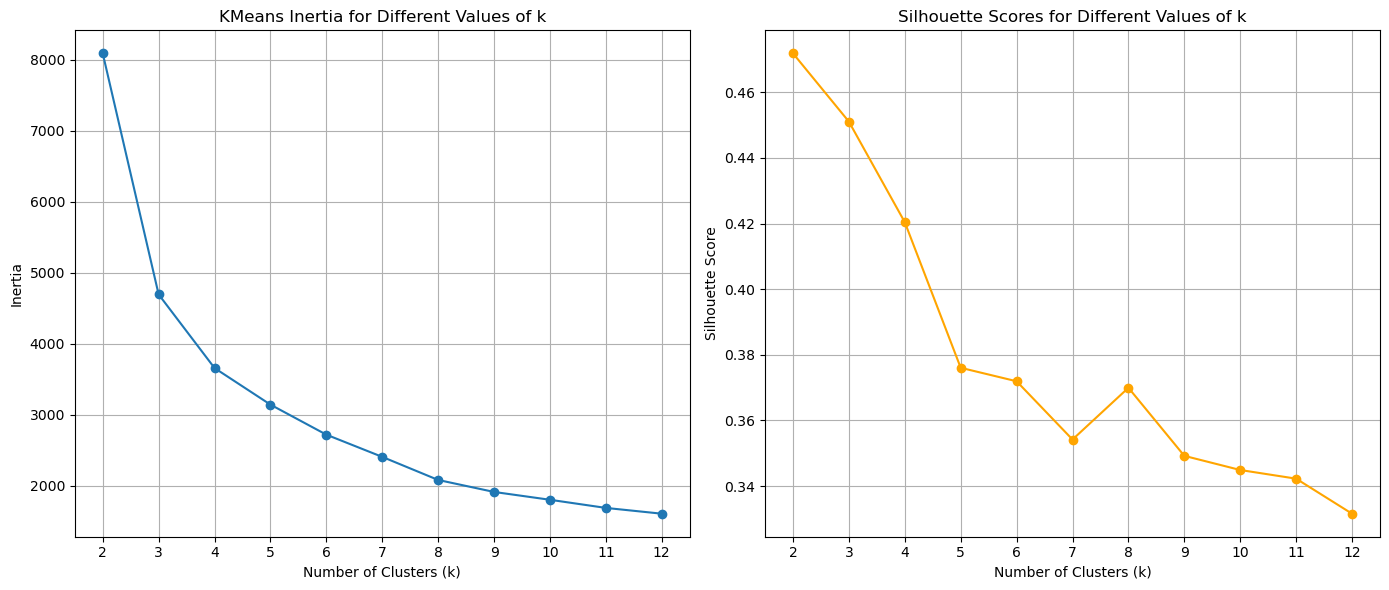

In [118]:
max_k = 12
inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, cluster_labels)
    silhoutte_scores.append(sil_score)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

#### **Elbow Point Insights with Silhouette Scores Insights:**

1. **Inertia Plot:**  
   - Sharp decrease between **k = 2 and k = 4**, with an elbow at **k = 4**, indicating optimal clusters.  

2. **Silhouette Scores:**  
   - Highest at **k = 2** (~0.47), but scores for **k = 3 (~0.45)** and **k = 4 (~0.42)** remain strong.  
   - Scores drop significantly beyond **k = 5**, indicating weaker cluster quality.  

#### **Recommendation:**  
- **Optimal Clusters:** **k = 4** balances inertia reduction and silhouette score.  
- **Next Step:** Apply KMeans with **k = 4** to define customer segments. 

In [119]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_df)
cluster_labels

array([2, 2, 1, ..., 1, 1, 0])

In [120]:
non_outliers_df["Cluster"] = cluster_labels
non_outliers_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5846,18282.00,178.05,2,2011-12-02 11:43:00,7,3
5848,18284.00,411.68,1,2010-10-04 11:33:00,431,1
5849,18285.00,377.00,1,2010-02-17 10:24:00,660,1
5850,18286.00,1246.43,2,2010-08-20 11:57:00,476,1


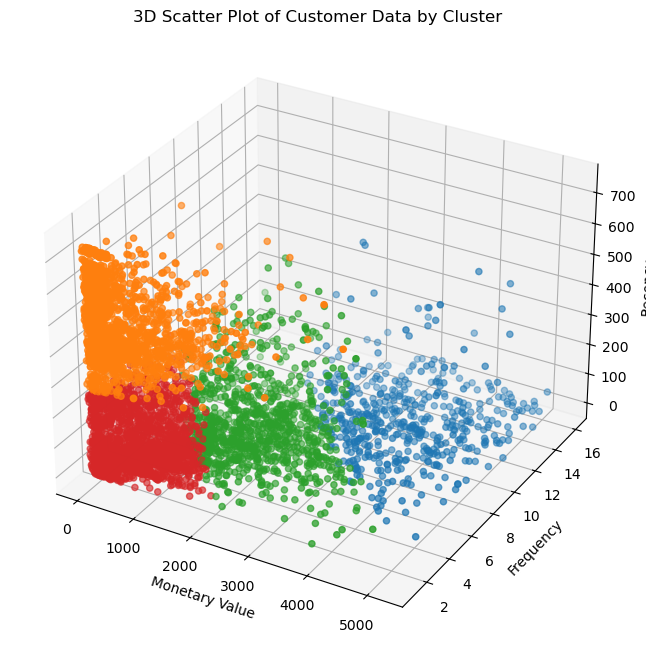

In [121]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'], 
                     non_outliers_df['Frequency'], 
                     non_outliers_df['Recency'], 
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

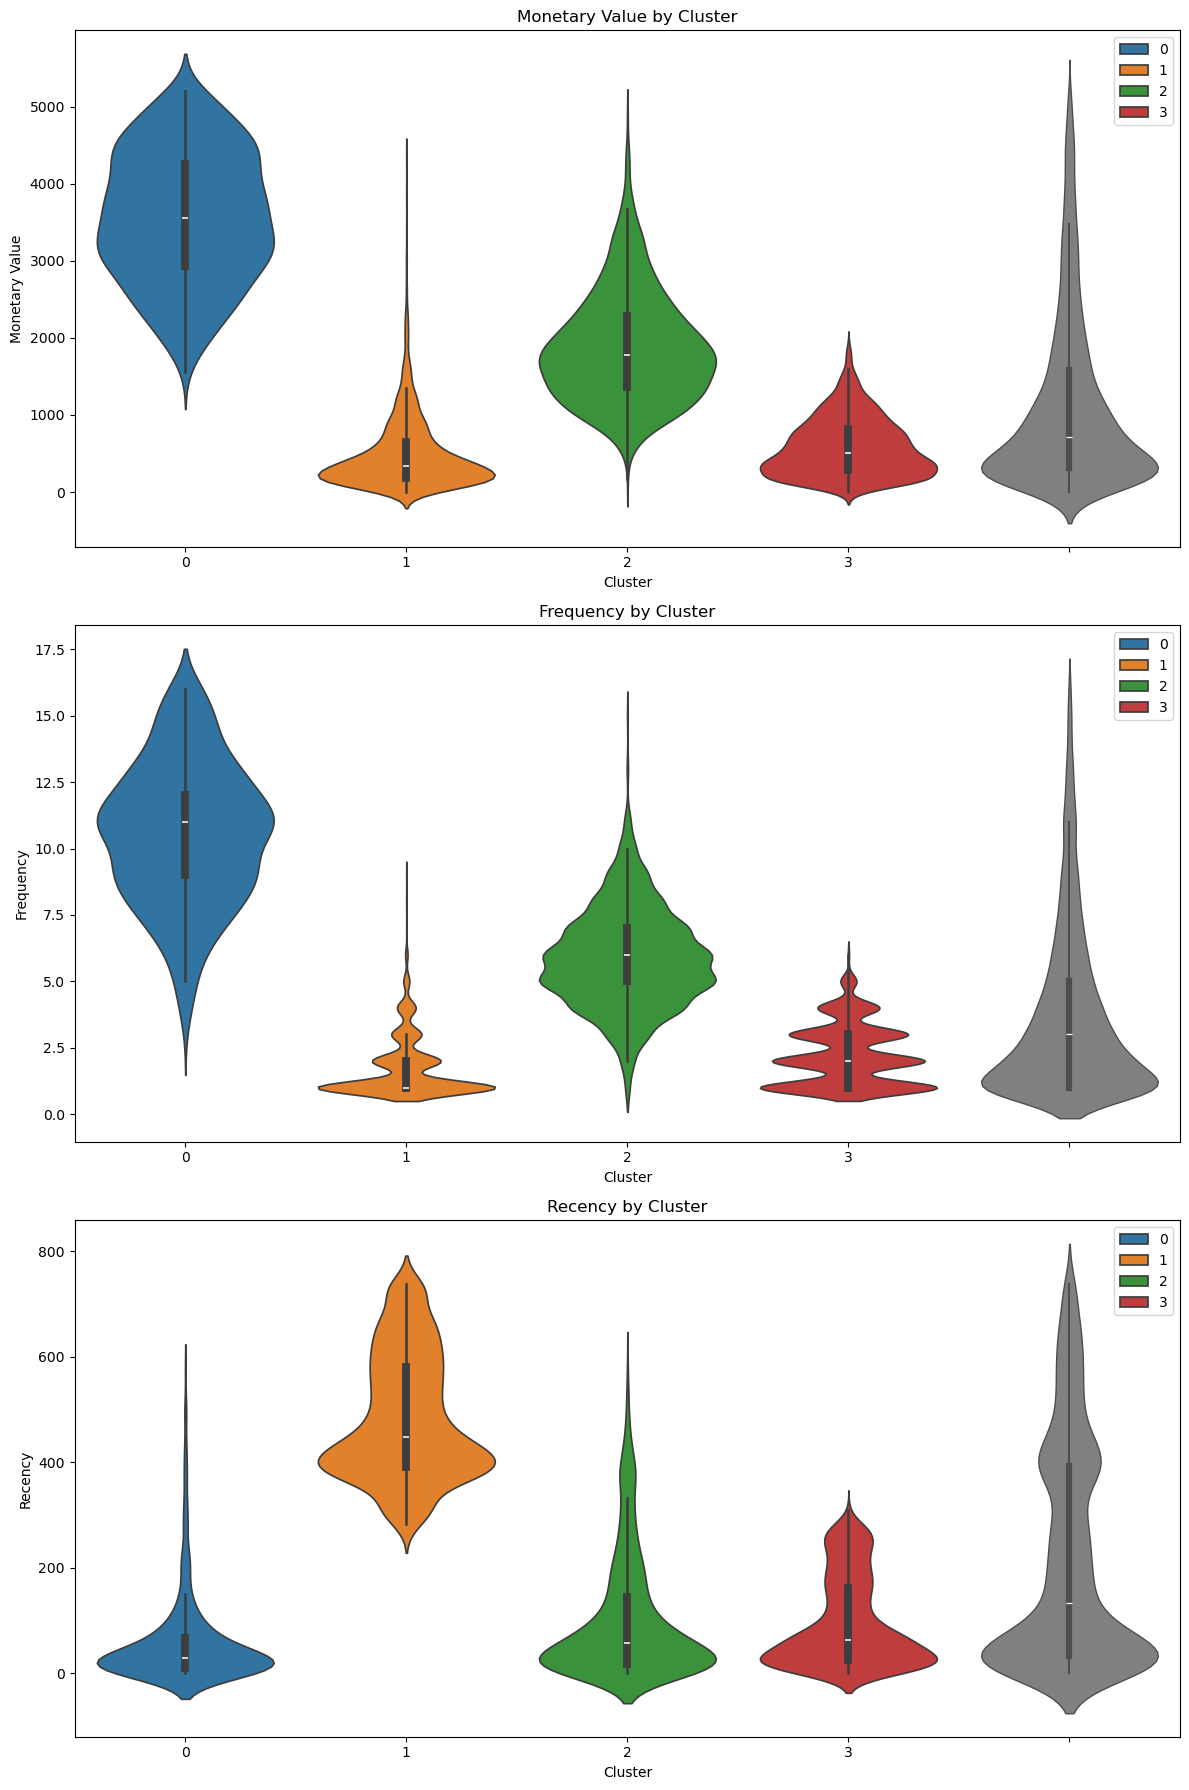

In [122]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### **Insights from Cluster Analysis (No-Outlier Clusters):**

| **Cluster** | **Monetary Value** | **Frequency**  | **Recency**        | **Customer Type**           |
|-------------|--------------------|----------------|--------------------|-----------------------------|
| **0**       | High (~2000–5000)  | High (~8–15)   | Low (recent)       | **High-value frequent customers** |
| **1**       | Very Low (~0–500)  | Very Low (~0–2)| High (inactive)    | **Low-value inactive customers** |
| **2**       | Moderate (~1000–3000)| Moderate (~5–8)| Low to Moderate    | **Medium-value active customers** |
| **3**       | Low (~500–1000)    | Low (~1–3)     | Low to Moderate    | **Low-value recent customers** |

#### **Recommendations & Actions**

**1. Cluster 0: High-Value Frequent Customers**

**Goal:** Retain loyalty.  
- Launch VIP perks, personalized offers, and early access events.  
- Reward loyalty with discounts or upgrades.  
- Gather feedback to maintain satisfaction.  

**2. Cluster 1: Low-Value Inactive Customers**
**Goal:** Reactivate engagement.  
- Use re-engagement emails with tailored discounts.  
- Run "We Miss You" campaigns and retargeting ads.  
- Identify and address barriers via surveys or A/B tests.  

**3. Cluster 2: Medium-Value Active Customers**

**Goal:** Boost spending and frequency.  
- Cross-sell and upsell complementary products.  
- Offer tiered rewards and time-sensitive promotions.  
- Incentivize higher-value purchases.  

**4. Cluster 3: Recent Low-Value Customers**

**Goal:** Convert to repeat buyers.  
- Follow up post-purchase with discounts for next transactions.  
- Promote low-cost, trending items.  
- Offer quick-win incentives like limited-time coupons or small rewards for repeat purchases.  
##### **Strategic Focus:**
1. **Cluster 0:** Retain **high-value frequent customers** with loyalty programs and personalized offers.  
2. **Cluster 1:** Reactivate **low-value inactive customers** via targeted campaigns.  
3. **Cluster 2:** Encourage **medium-value active customers** to increase spending/frequency with upselling.  
4. **Cluster 3:** Convert **recent low-value customers** into frequent shoppers through promotions or incentives.

### Outlier Ckusters

In [123]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])
outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,77352.96,3,2011-01-18 10:01:00,325,-1
1,12347.00,5633.32,8,2011-12-07 15:52:00,1,-1
10,12356.00,5613.68,6,2011-11-17 08:40:00,22,-1
11,12357.00,17437.66,2,2011-11-06 16:07:00,32,-1
13,12359.00,8935.94,10,2011-10-13 12:47:00,57,-1
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


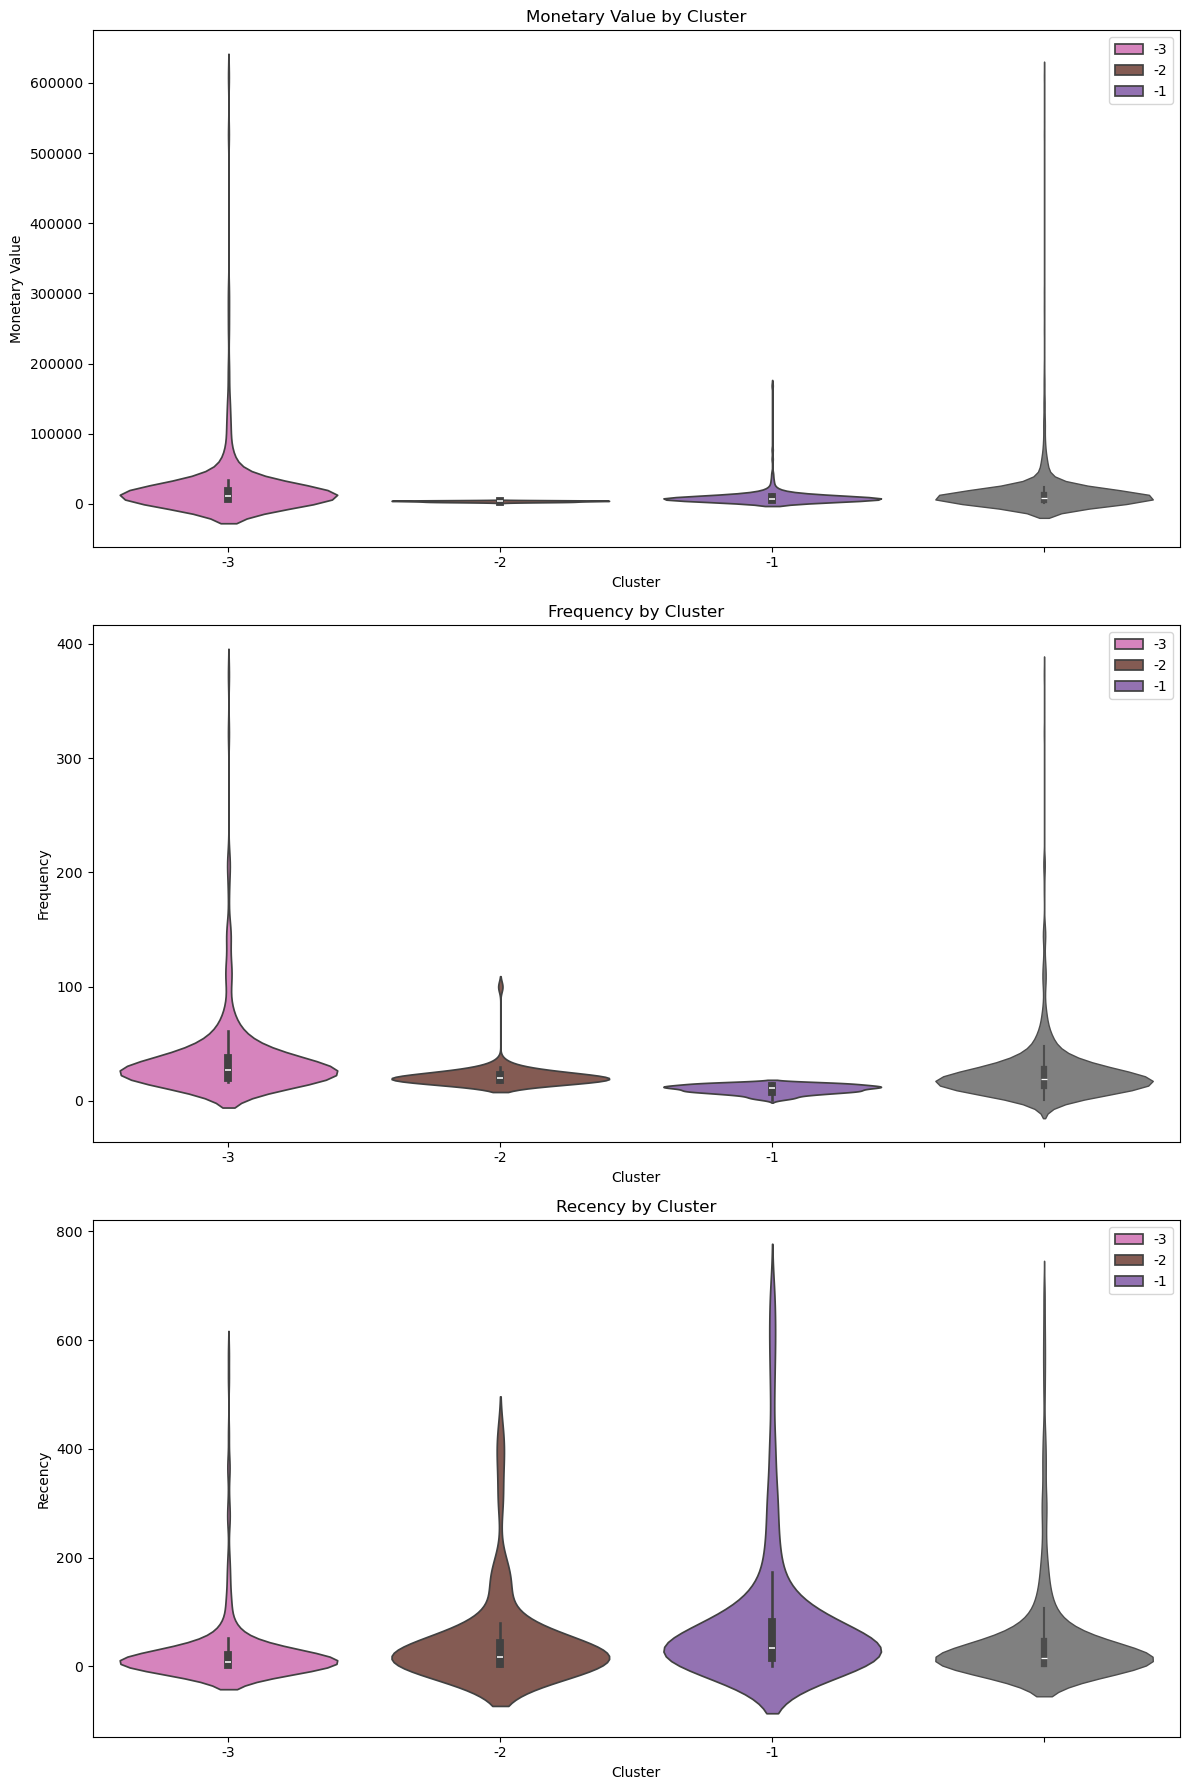

In [124]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

#### **Cluster Insights & Recommendations (Outlier Dataset)**

**1. Key Metrics by Cluster:**
| **Cluster** | **Monetary Value**      | **Frequency**         | **Recency**             | **Customer Type**                 |
|-------------|-------------------------|-----------------------|-------------------------|----------------------------------|
| **-1**      | Low to moderate        | Very low (~0–5)       | Highly recent (~0–50)   | **Low-frequency recent customers** |
| **-2**      | Very low               | Very low (~0–10)      | Semi-active (~0–200)    | **Low-value occasional customers** |
| **-3**      | High variability, some extreme values (**600,000+**) | Moderate to high (~0–400) | Recent, with some inactivity     | **High-value frequent customers** |


**Recommendations & Actions:**
1. Cluster -1: Low-Frequency Recent Customers**  
    **Goal:** Convert to repeat buyers.  
    - Offer follow-up discounts or loyalty points.  
    - Promote trending, low-cost bundles to drive interest.  
    - Use urgency (e.g., time-limited offers) to encourage purchases.  

2. Cluster -2: Low-Value Occasional Customers**  
    **Goal:** Reactivate and increase engagement.  
    - Send reactivation emails with exclusive discounts.  
    - Promote popular, affordable products to increase spending.  
    - Use reminders and limited-time incentives to nudge purchases.  

3. Cluster -3: High-Value Frequent Customers**  
    **Goal:** Retain and reward loyalty.  
    - Offer VIP benefits, early access, and personalized offers.  
    - Host exclusive events or premium sales for top-tier customers.  
    - Collect feedback to ensure satisfaction and prevent churn.  

**Strategic Focus:**  
- **Convert** Cluster **-1** into loyal buyers.  
- **Reactivate** Cluster **-2** with targeted campaigns.  
- **Retain** Cluster **-3** through exclusive loyalty initiatives.  

In [126]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [127]:
full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2
...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3


In [128]:
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
2,12348.00,1658.40,5,2011-09-25 13:13:00,74,2,NURTURE
3,12349.00,3678.69,3,2011-11-21 09:51:00,18,2,NURTURE
4,12350.00,294.40,1,2011-02-02 16:01:00,309,1,RE-ENGAGE
5,12351.00,300.93,1,2010-11-29 15:23:00,374,1,RE-ENGAGE
6,12352.00,1729.54,9,2011-11-03 14:37:00,35,2,NURTURE
...,...,...,...,...,...,...,...
5790,18226.00,11878.88,26,2011-10-26 13:36:00,43,-3,DELIGHT
5793,18229.00,10803.71,28,2011-11-28 09:48:00,11,-3,DELIGHT
5795,18231.00,6875.07,28,2011-05-31 14:18:00,191,-3,DELIGHT
5809,18245.00,6324.98,20,2011-12-02 14:48:00,6,-3,DELIGHT


#### **Visualisation**

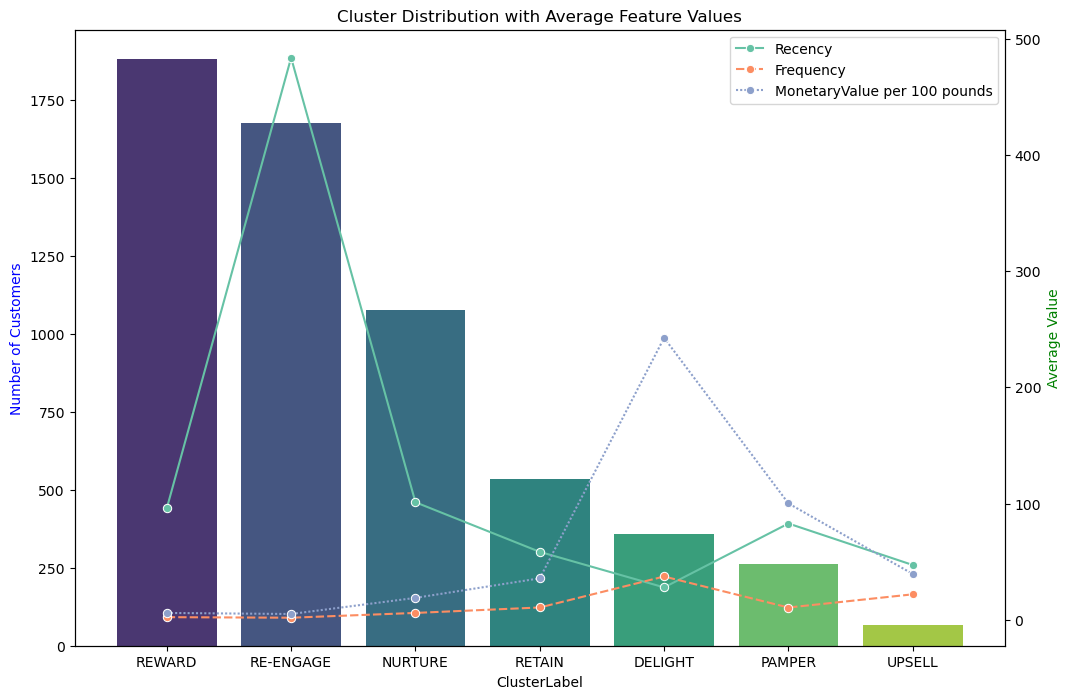

In [129]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

#### **Customers Cluster Profile Insights**
**1. Cluster Overview:**
- **REWARD (~1900+)** and **RE-ENGAGE (~1700+)** dominate.  
- **UPSELL** is the smallest, representing a niche segment.

**Feature Highlights**

| **Cluster**   | **Recency**         | **Frequency**        | **Monetary Value**    |
|---------------|---------------------|----------------------|-----------------------|
| **REWARD**    | High (~300–400)     | Low                  | Low                   |
| **RE-ENGAGE** | Very high (~450+)   | Very low             | Low                   |
| **NURTURE**   | Moderate (~200–300) | Low                  | Moderate              |
| **RETAIN**    | Low (~100–200)      | Moderate             | Moderate              |
| **DELIGHT**   | Low (~50–100)       | High                 | High                  |
| **PAMPER**    | Low (~50–100)       | Low                  | Moderate              |
| **UPSELL**    | Lowest (~0–50)      | High                 | High                  |


**Cluster Actions:**
1. **REWARD (Largest):** Boost engagement via loyalty campaigns.  
2. **RE-ENGAGE:** Reactivate inactive customers with win-back offers.  
3. **NURTURE:** Encourage regular activity with targeted messaging.  
4. **RETAIN:** Prevent churn with steady engagement strategies.  
5. **DELIGHT:** Reward high spenders with exclusive perks.  
6. **PAMPER:** Drive upselling via personalized recommendations.  
7. **UPSELL:** Leverage recent activity to cross-sell and upsell.  

**Action Plan:**  
- **RE-ENGAGE & REWARD:** Reactivate with tailored campaigns.  
- **DELIGHT & UPSELL:** Maximize revenue with high-value offers.  
- **NURTURE & PAMPER:** Boost engagement and spending via promotions.  